In [311]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Useful functions ###

In [312]:
#convert shot flags to colors
def flag_colors(flag):
    if flag == 1: return 'green'
    if flag == 0: return 'red'
    return 'black'

# Import data

In [313]:
data = pd.read_csv('data.csv')

In [314]:
data.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [315]:
list(data.columns.values)

['action_type',
 'combined_shot_type',
 'game_event_id',
 'game_id',
 'lat',
 'loc_x',
 'loc_y',
 'lon',
 'minutes_remaining',
 'period',
 'playoffs',
 'season',
 'seconds_remaining',
 'shot_distance',
 'shot_made_flag',
 'shot_type',
 'shot_zone_area',
 'shot_zone_basic',
 'shot_zone_range',
 'team_id',
 'team_name',
 'game_date',
 'matchup',
 'opponent',
 'shot_id']

In [316]:
data.iloc[0]

action_type                    Jump Shot
combined_shot_type             Jump Shot
game_event_id                         10
game_id                         20000012
lat                              33.9723
loc_x                                167
loc_y                                 72
lon                             -118.103
minutes_remaining                     10
period                                 1
playoffs                               0
season                           2000-01
seconds_remaining                     27
shot_distance                         18
shot_made_flag                       NaN
shot_type                 2PT Field Goal
shot_zone_area             Right Side(R)
shot_zone_basic                Mid-Range
shot_zone_range                16-24 ft.
team_id                       1610612747
team_name             Los Angeles Lakers
game_date                     2000-10-31
matchup                        LAL @ POR
opponent                             POR
shot_id         

# Notes

* Can we improve the missing data strategy?
* Are all the limitations to algorithm application verified?

* prevent leakage: train only on shots prior to the ones we're predicting (year)
* select features and then explore number of neighbours

* target: score=0.75

# Preprocessing

In [317]:
# TRAINING AND TEST DATA
train_data, test_data = train_test_split(data, test_size = 0.2, random_state = 0)

In [318]:
# MISSING DATA
# don't consider rows with shot_made_flag = NaN
train_data = train_data[np.isfinite(train_data['shot_made_flag'])]
test_data = test_data[np.isfinite(test_data['shot_made_flag'])]

   # Exploring features

### Opponent

In [319]:
total_shots = pd.pivot_table(data, index="opponent", values="shot_id", aggfunc='count')

In [320]:
shots_scored = pd.pivot_table(data, index="opponent", values="shot_made_flag", aggfunc='sum')

In [321]:
accuracy = shots_scored/total_shots

In [322]:
accuracy.mean()

0.3691933909157366

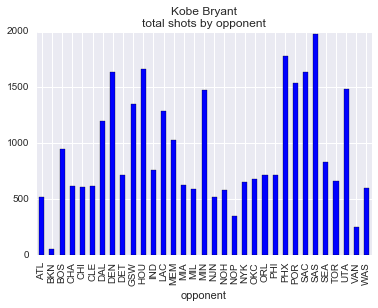

In [323]:
total_shots.plot.bar(title='Kobe Bryant\ntotal shots by opponent')

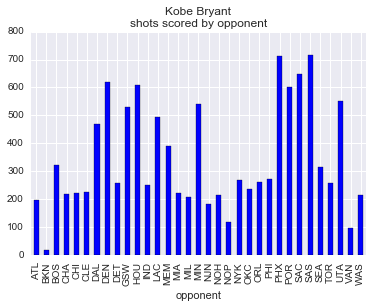

In [324]:
shots_scored.plot.bar(title='Kobe Bryant\nshots scored by opponent')

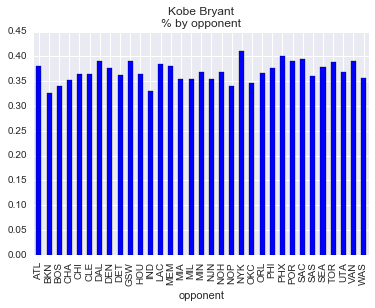

In [325]:
accuracy.plot.bar(title='Kobe Bryant\n% by opponent')

#### Comments:

* The opponent doesn't seem to influence the accuracy

* also, spikes for long-time shitty teams: NYK, CLE, GSW(!), PHX, SAC

### Shots by distance

In [326]:
total_distance = pd.pivot_table(data, index="shot_distance", values="shot_id", aggfunc='count')

In [327]:
shots_scored = pd.pivot_table(data, index="shot_distance", values="shot_made_flag", aggfunc='sum')

In [328]:
accuracy = shots_scored/total_distance

[0, 30, 0, 6000]

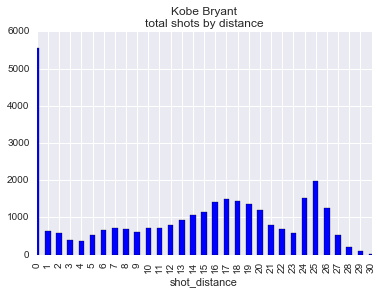

In [329]:
total_distance.plot.bar(title='Kobe Bryant\ntotal shots by distance')
plt.axis([0, 30, 0, 6000])

[0, 30, 0, 6000]

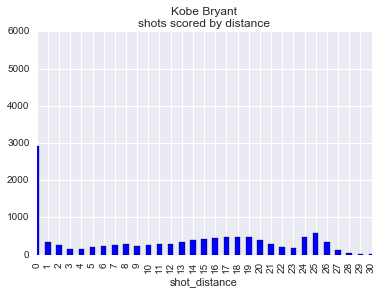

In [330]:
shots_scored.plot.bar(title='Kobe Bryant\nshots scored by distance')
plt.axis([0, 30, 0, 6000])

[0, 30, 0, 1]

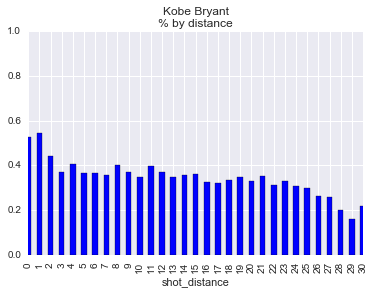

In [331]:
accuracy.plot.bar(title='Kobe Bryant\n% by distance')
plt.axis([0, 30, 0, 1])

#### Comments:

* ~~Only 30 appears to have a very different percentage~~ now looking sweeter, but still not good - certainly didn't miss half his dunks for his career!
* PM: totally agree!

### Minutes remaining

In [332]:
minutes = pd.pivot_table(data, index="minutes_remaining", values="shot_id", aggfunc='count')

In [333]:
shots_scored = pd.pivot_table(data, index="minutes_remaining", values="shot_made_flag", aggfunc='sum')

In [334]:
accuracy = shots_scored/minutes

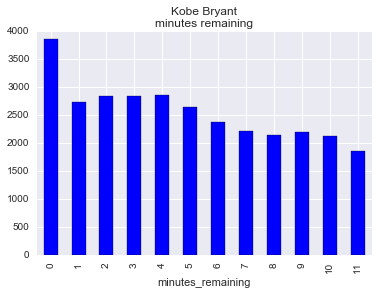

In [335]:
minutes.plot.bar(title='Kobe Bryant\nminutes remaining')

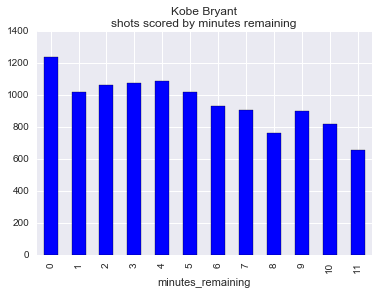

In [336]:
shots_scored.plot.bar(title='Kobe Bryant\nshots scored by minutes remaining')

[0, 11, 0, 0.5]

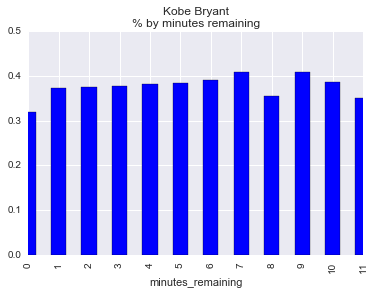

In [337]:
accuracy.plot.bar(title='Kobe Bryant\n% by minutes remaining')
plt.axis([0, 11, 0, .5])

### Seconds remaining

In [338]:
seconds = pd.pivot_table(data, index="seconds_remaining", values="shot_id", aggfunc='count')

In [339]:
shots_scored = pd.pivot_table(data, index="seconds_remaining", values="shot_made_flag", aggfunc='sum')

In [340]:
accuracy = shots_scored/seconds

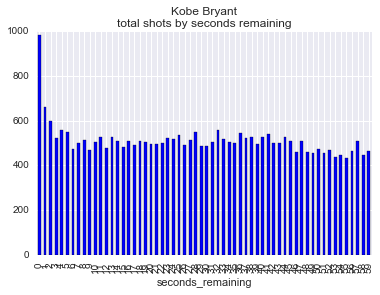

In [341]:
seconds.plot.bar(title='Kobe Bryant\ntotal shots by seconds remaining')

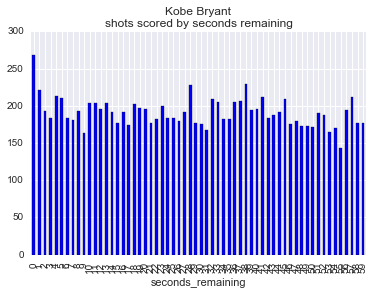

In [342]:
shots_scored.plot.bar(title='Kobe Bryant\nshots scored by seconds remaining')

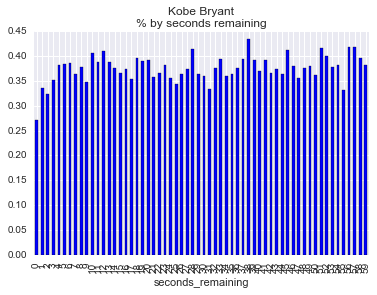

In [343]:
accuracy.plot.bar(title='Kobe Bryant\n% by seconds remaining')

### Shots by zone range

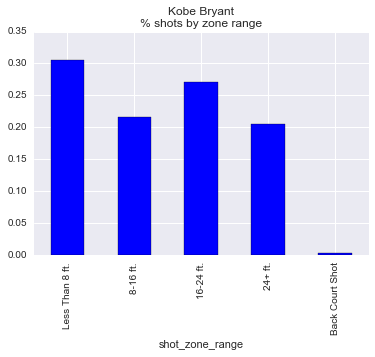

In [344]:
shot_zones = pd.pivot_table(data, index="shot_zone_range", values="shot_id", aggfunc='count')
shot_zones_pct = shot_zones/shot_zones.sum()

# change order
shot_zones_pct = shot_zones_pct.reindex(index=['Less Than 8 ft.',  u'8-16 ft.', u'16-24 ft.', u'24+ ft.', u'Back Court Shot'])
shot_zones_pct.plot.bar(title='Kobe Bryant\n% shots by zone range')

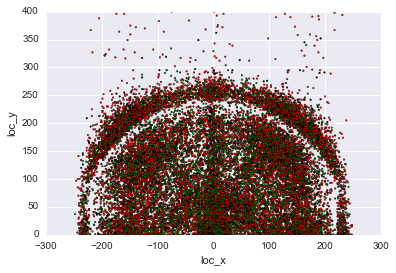

In [345]:
# let's try plotting all of his shots and show if miss or hit

shots_pos = data[['loc_x', 'loc_y']]
shot_colors = map(flag_colors, data.shot_made_flag)
shots_pos.plot.scatter(x='loc_x', y='loc_y', s=3, c=shot_colors, ylim=(0,400))

#### Comments:

* Front, 45 degrees or 90 degrees

### Shots by action type

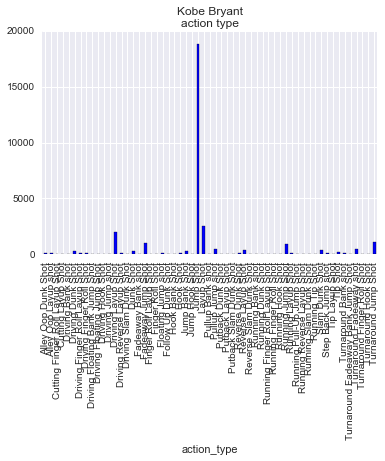

In [346]:
shots_actionType = pd.pivot_table(data, index="action_type", values="shot_id", aggfunc='count')
shots_actionType.plot.bar(title='Kobe Bryant\naction type')

### Combined shot type

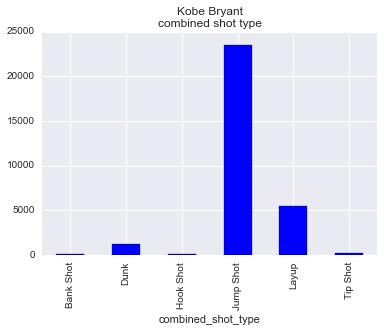

In [347]:
shots_combined = pd.pivot_table(data, index="combined_shot_type", values="shot_id", aggfunc='count')
shots_combined.plot.bar(title='Kobe Bryant\ncombined shot type')

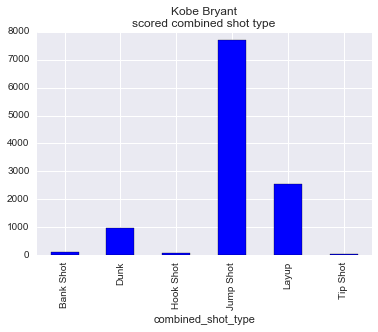

In [348]:
combined_scored = pd.pivot_table(data, index="combined_shot_type", values="shot_made_flag", aggfunc='sum')
combined_scored.plot.bar(title='Kobe Bryant\nscored combined shot type')

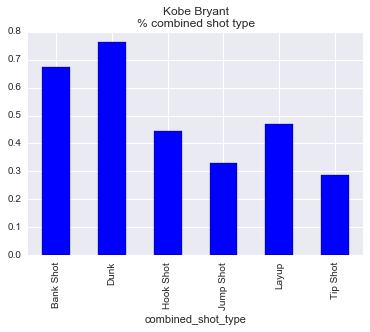

In [349]:
accuracy = combined_scored / shots_combined
accuracy.plot.bar(title='Kobe Bryant\n% combined shot type')

### Shots by period

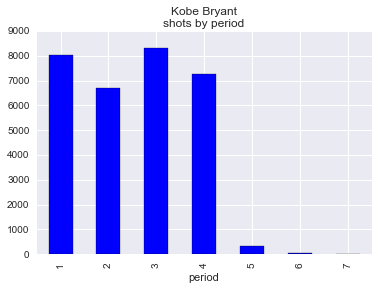

In [350]:
shots_period = pd.pivot_table(data, index="period", values="shot_id", aggfunc='count')
shots_period.plot.bar(title='Kobe Bryant\nshots by period')

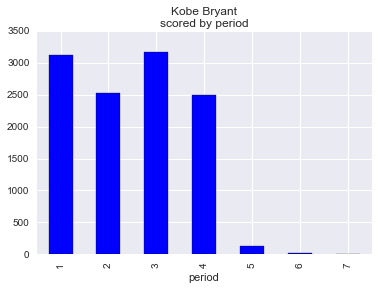

In [351]:
period_scored = pd.pivot_table(data, index="period", values="shot_made_flag", aggfunc='sum')
period_scored.plot.bar(title='Kobe Bryant\nscored by period')

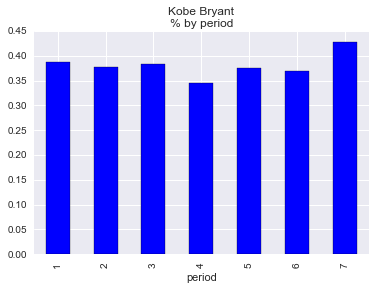

In [352]:
accuracy = period_scored/shots_period
accuracy.plot.bar(title='Kobe Bryant\n% by period')

### Playoffs

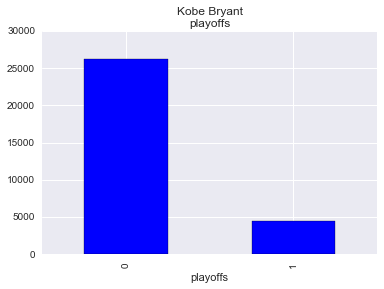

In [353]:
shots_playoffs = pd.pivot_table(data, index="playoffs", values="shot_id", aggfunc='count')
shots_playoffs.plot.bar(title='Kobe Bryant\nplayoffs')

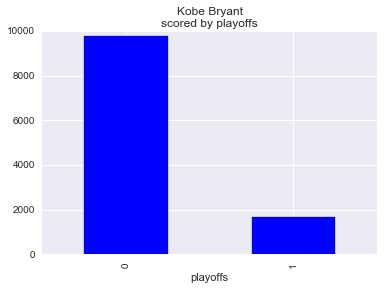

In [354]:
playoffs_scored = pd.pivot_table(data, index="playoffs", values="shot_made_flag", aggfunc='sum')
playoffs_scored.plot.bar(title='Kobe Bryant\nscored by playoffs')

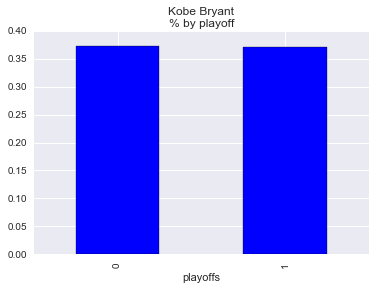

In [355]:
accuracy = playoffs_scored/shots_playoffs
accuracy.plot.bar(title='Kobe Bryant\n% by playoff')

### Shot type

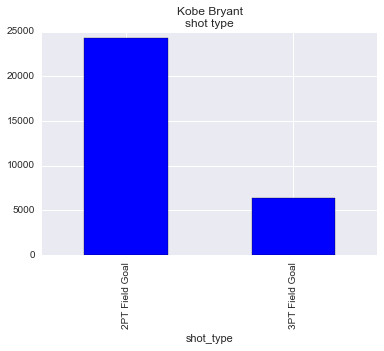

In [356]:
shot_type = pd.pivot_table(data, index="shot_type", values="shot_id", aggfunc='count')
shot_type.plot.bar(title='Kobe Bryant\nshot type')

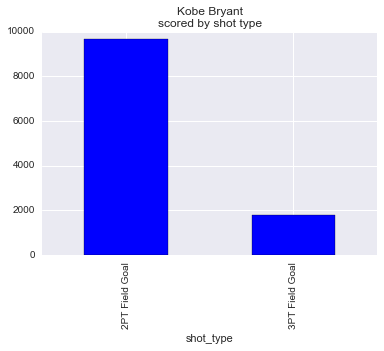

In [357]:
shotType_scored = pd.pivot_table(data, index="shot_type", values="shot_made_flag", aggfunc='sum')
shotType_scored.plot.bar(title='Kobe Bryant\nscored by shot type')

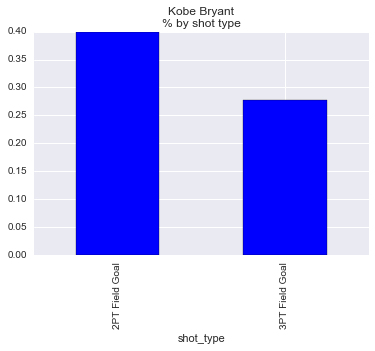

In [358]:
accuracy = shotType_scored/shot_type
accuracy.plot.bar(title='Kobe Bryant\n% by shot type')

## Dunks issue

* Kobe scored 780 dunk from 00/01 to 15/16
* http://www.basketball-reference.com/players/b/bryanko01.html
* Kobe's carrer started in 96/97

In [359]:
shots_combined = pd.pivot_table(data, index="combined_shot_type", values="shot_id", aggfunc='count')

In [360]:
shots_combined

combined_shot_type
Bank Shot      141
Dunk          1286
Hook Shot      153
Jump Shot    23485
Layup         5448
Tip Shot       184
Name: shot_id, dtype: int64

In [361]:
combined_scored = pd.pivot_table(data, index="combined_shot_type", values="shot_made_flag", aggfunc='sum')

In [362]:
combined_scored

combined_shot_type
Bank Shot      95
Dunk          980
Hook Shot      68
Jump Shot    7708
Layup        2561
Tip Shot       53
Name: shot_made_flag, dtype: float64

#### Conclusion:
* We have more successful dunks, which is possible because we have data from 96/97 to 00/01

### Missing Analysis

* Home/away
* Time of the year
* Location

# 1. kNN

** References: **
* http://scikit-learn.org/stable/modules/neighbors.html
* http://www.amazon.com/Building-Machine-Learning-Systems-Python/dp/1784392774/ref=sr_1_1?ie=UTF8&qid=1461733493&sr=8-1&keywords=luis+pedro+coelho+python

In [363]:
from sklearn import neighbors

In [364]:
knn = neighbors.KNeighborsClassifier(n_neighbors=2)

In [365]:
x1 = train_data['loc_x'].reshape(len(train_data['loc_x']),1)
x2 = train_data['loc_y'].reshape(len(train_data['loc_y']),1)
x3 = train_data['shot_distance'].reshape(len(train_data['shot_distance']),1)

In [366]:
x = np.concatenate((x1,x2,x3), axis=1)
y = train_data['shot_made_flag'].reshape(len(train_data['shot_made_flag']),1)

print x.shape
print y.shape

(20550L, 3L)
(20550L, 1L)


In [367]:
knn.fit(x,y.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [368]:
#knn.predict([0])

In [369]:
#knn.predict_proba([0])

## 1.1 kNN evaluation

In [370]:
x1_test = test_data['loc_x'].reshape(len(test_data['loc_x']),1)
x2_test = test_data['loc_y'].reshape(len(test_data['loc_y']),1)
x3_test = test_data['shot_distance'].reshape(len(test_data['shot_distance']),1)

In [371]:
x_test = np.concatenate((x1_test,x2_test,x3_test), axis=1)
y_test = test_data['shot_made_flag'].reshape(len(test_data['shot_made_flag']),1)

In [372]:
knn.score(x_test,y_test)

0.57159510394404511

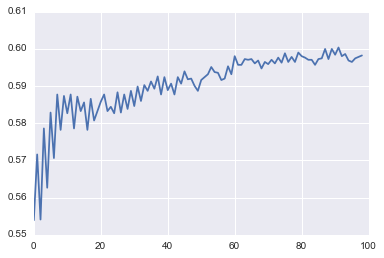

In [373]:
# try different numbers of neighbours
l = []
for i in xrange(1,100):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(x,y.ravel())
    
    sc = knn.score(x_test,y_test)
    l.append(sc)
    
plt.plot(l)